# Part-1: Keşifçi Veri Analizi ve Veri Görselleştirme

### 1.1.1 Veri Seti Hikâyesi 

Bu veri seti, bir müşteri segmentasyonu çalışması için hazırlanmıştır. Amaç, müşterileri farklı gruplara (A, B, C, D) ayırmaktır.
Segmentasyon, müşterilerin demografik, sosyal ve ekonomik özelliklerine göre gruplandırılmasını sağlar ve bu sayede şirketler, her bir
segmentin ihtiyaçlarına özel stratejiler geliştirebilir.

Veri seti aşağıdaki değişkenleri içerir:
- ID: Müşteri kimlik numarası. Her müşteri için benzersiz bir değerdir.
- Gender: Cinsiyet. Müşterinin erkek ya da kadın olduğunu belirtir.
- Ever_Married: Evlenme durumu. Müşterinin evli olup olmadığını ifade eder.
- Age: Yaş. Müşterinin yaş bilgisidir.
- Graduated: Mezuniyet durumu. Müşterinin üniversite mezunu olup olmadığını belirtir.
- Profession: Meslek. Müşterinin mesleğini belirtir ve birçok farklı sınıf içerebilir.
- Work_Experience: İş tecrübesi (yıl olarak). Müşterinin toplamda kaç yıllık iş deneyimine sahip olduğunu belirtir.
- Spending_Score: Harcama skoru. Müşterinin harcama alışkanlıklarına göre düşük, orta veya yüksek olarak kategorize edilmiştir.
- Family_Size: Aile büyüklüğü. Müşterinin aile üye sayısını içerir.
- Segmentation: Müşteri segmenti. Müşterilerin ait olduğu A, B, C veya D gruplarını belirtir. Bu hedef değişkendir ve analizlerin odak noktasıdır.



### 1.2 Veri Yapısı

In [1]:
import pandas as pd

# Veri setinin yüklenmesi
file_path = 'Test.csv'  
data = pd.read_csv(file_path, sep=";", decimal=".")

# Sayısal ve kategorik kolonların ayrılması
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Kolon isimleri ve değer sayıları yazdırma
max_col_length = max(len(column) for column in data.columns)

print("\nSayısal Kolonlar ve Değer Sayıları:")
for column in numeric_cols:
    print(f"{column.ljust(max_col_length)} : {data[column].notnull().sum()} veri var")

print("\nKategorik Kolonlar ve Değer Sayıları:")
for column in categorical_cols:
    print(f"{column.ljust(max_col_length)} : {data[column].notnull().sum()} veri var")
    total_columns = len(data.columns)
print(f"\nToplam Sütun Sayısı: {total_columns}")



Sayısal Kolonlar ve Değer Sayıları:
ID              : 2627 veri var
Age             : 2627 veri var
Work_Experience : 2358 veri var
Family_Size     : 2514 veri var

Kategorik Kolonlar ve Değer Sayıları:
Gender          : 2627 veri var
Ever_Married    : 2577 veri var
Graduated       : 2603 veri var
Profession      : 2589 veri var
Spending_Score  : 2627 veri var
Segmentation    : 2627 veri var

Toplam Sütun Sayısı: 10


In [6]:

print(data.head().to_string(index=False))



    ID Gender Ever_Married  Age Graduated Profession  Work_Experience Spending_Score  Family_Size Segmentation
458989 Female          Yes   36       Yes   Engineer              0.0            Low          1.0            B
458994   Male          Yes   37       Yes Healthcare              8.0        Average          4.0            A
458996 Female          Yes   69        No        NaN              0.0            Low          1.0            A
459000   Male          Yes   59        No  Executive             11.0           High          2.0            B
459001 Female           No   19        No  Marketing              NaN            Low          4.0            A


### 1.2.1 Sayısal Değişkenler için Betimsel İstatistikler

In [133]:
import pandas as pd

# Veri setinin yüklenmesi
file_path = 'Test.csv' 
data = pd.read_csv(file_path, sep=";", decimal=".")

# Sayısal değişkenlerin seçilmesi
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Gerekli istatistikleri hesaplamak
statistics = data[numeric_cols].agg(['count', 'mean', 'std', 'min', 'median', 'max'])

# Mod ekleme (Her sütun için en sık görülen değer)
mod_values = data[numeric_cols].mode().iloc[0]
statistics.loc['mode'] = mod_values

# Sayısal değişkenler için betimsel istatistikler
print("\nSayısal Değişkenler için Betimsel İstatistikler:")
pd.set_option('display.expand_frame_repr', False) 
print(statistics.T.to_string())



Sayısal Değişkenler için Betimsel İstatistikler:
                  count           mean          std       min    median       max      mode
ID               2627.0  463433.918919  2618.245698  458989.0  463379.0  467968.0  458989.0
Age              2627.0      43.649791    16.967015      18.0      41.0      89.0      42.0
Work_Experience  2358.0       2.552587     3.341094       0.0       1.0      14.0       1.0
Family_Size      2514.0       2.825378     1.551906       1.0       2.0       9.0       2.0


### 1.2.2 Kategorik Değişkenler için Sınıf Sayıları ve Frekanslar

In [118]:
# Kategorik değişkenlerin seçilmesi
categorical_cols = data.select_dtypes(include=['object']).columns

# Kategorik değişkenler için sınıf sayıları ve frekanslar
print("\nKategorik Değişkenler için Sınıf Sayıları ve Frekanslar:")
for col in categorical_cols:
    print(f"\n{col} değişkeni için sınıf bilgisi:")
    print(data[col].value_counts())
    print(f"\n{col} değişkeni için toplam sınıf sayısı: {data[col].nunique()}")
    print("\n***********************************************************")




Kategorik Değişkenler için Sınıf Sayıları ve Frekanslar:

Gender değişkeni için sınıf bilgisi:
Gender
Male      1424
Female    1203
Name: count, dtype: int64

Gender değişkeni için toplam sınıf sayısı: 2

***********************************************************

Ever_Married değişkeni için sınıf bilgisi:
Ever_Married
Yes    1520
No     1057
Name: count, dtype: int64

Ever_Married değişkeni için toplam sınıf sayısı: 2

***********************************************************

Graduated değişkeni için sınıf bilgisi:
Graduated
Yes    1602
No     1001
Name: count, dtype: int64

Graduated değişkeni için toplam sınıf sayısı: 2

***********************************************************

Profession değişkeni için sınıf bilgisi:
Profession
Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: count, dtype: int64

Profession değişkeni için toplam s

### 1.2.3 Eksik veri analizi

In [51]:
# Eksik veri analizi
print("\nEksik Veri Analizi:")
missing_data = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Eksik veri tablosu oluşturma
missing_summary = pd.DataFrame({
    'Eksik Veri Sayısı': missing_data,
    'Eksik Veri Yüzdesi': missing_percentage
})

# Sadece eksik veri içeren değişkenleri gösterme
missing_summary = missing_summary[missing_summary['Eksik Veri Sayısı'] > 0]

print(missing_summary)



Eksik Veri Analizi:
                 Eksik Veri Sayısı  Eksik Veri Yüzdesi
Ever_Married                    50            1.903312
Graduated                       24            0.913590
Profession                      38            1.446517
Work_Experience                269           10.239817
Family_Size                    113            4.301485





# 1.3 Veri Görselleştirme



### 1.3.1 Isı Haritası 

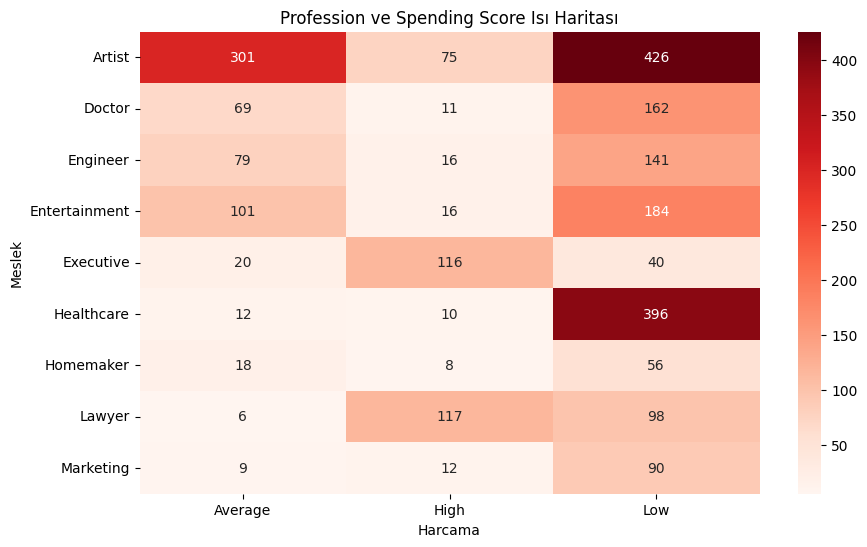

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Profession değişkenini kategorik olduğu için Spending Score ile gruplayarak ortalama değerlerini alıyoruz
heatmap_data = data.pivot_table(index='Profession', columns='Spending_Score', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='d', 
    cmap='Reds'
)
plt.title('Profession ve Spending Score Isı Haritası')
plt.ylabel('Meslek')
plt.xlabel('Harcama')
plt.show()


 Sanatçılar ve sağlık çalışanları arasında düşük harcama yapanlar yüksek oranda dikkat çekiyor.


### 1.3.2 Çubuk

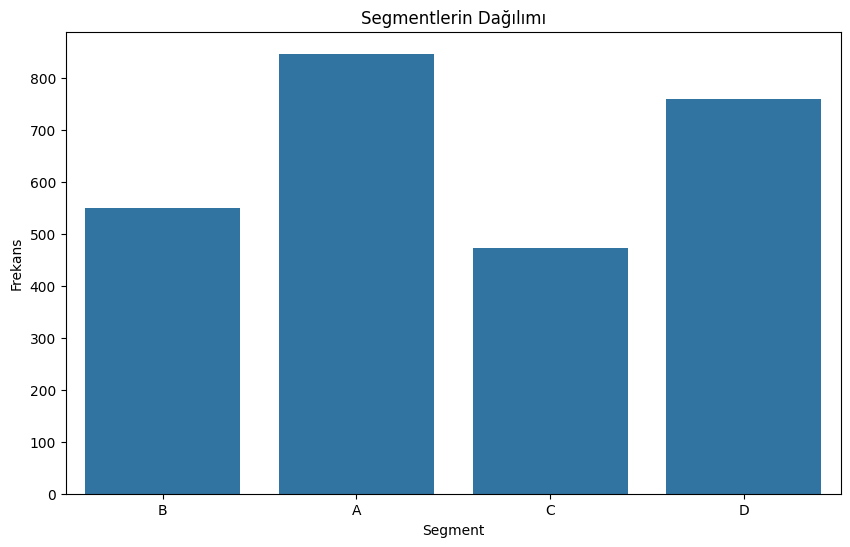

In [142]:
# Segmentation değişkeninin dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Segmentation")
plt.title("Segmentlerin Dağılımı")
plt.xlabel("Segment")
plt.ylabel("Frekans")
plt.show()


A segmenti en yüksek frekansa sahipken, C segmenti en düşük frekansa sahip.

### 1.3.3 Çaprazlama

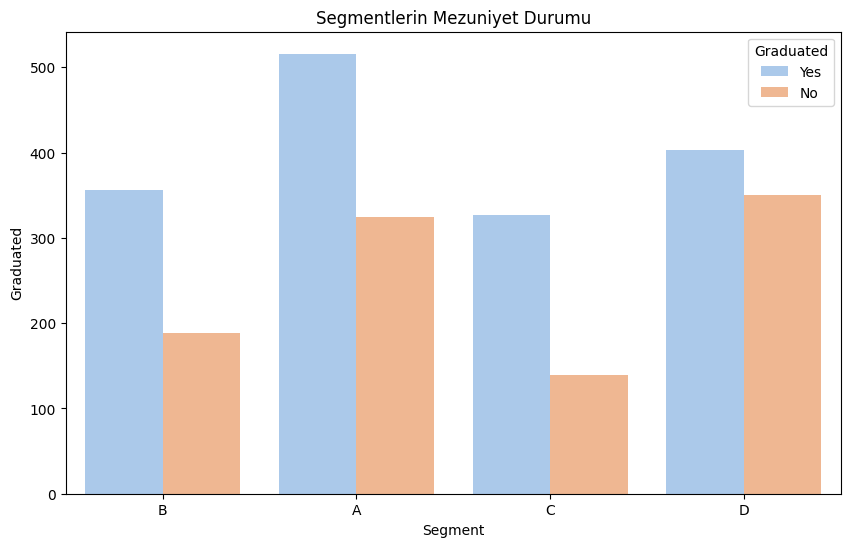

In [144]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Segmentation" , hue="Graduated", palette="pastel")
plt.title("Segmentlerin Mezuniyet Durumu")
plt.xlabel("Segment")
plt.ylabel("Graduated")
plt.show()

A segmentinde mezun oranı en yüksekken, C segmentinde mezun olmayanların oranı görece daha fazla.

### 1.3.4 Boxplot

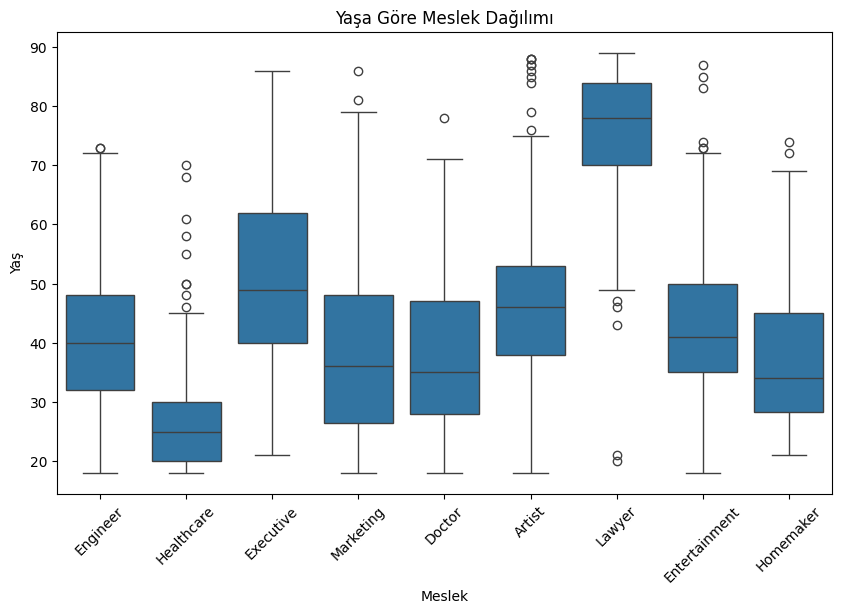

In [140]:
# Mesleklerin yaşlara göre dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Profession", y="Age")
plt.title("Yaşa Göre Meslek Dağılımı")
plt.xlabel("Meslek")
plt.ylabel("Yaş")
plt.xticks(rotation=45)
plt.show()


Avukatların yaşları 70-85 bandında iken sağlık çalışanlarının yaşları 20-30 bandındadır.

# Part-2: Veri Önişleme

### 2.1 Aykırı değer problemi

Baskılama ile aykırı değer problemi çözüldü ve Processed_Aykırı_Deger.csv olarak yeniden kaydettik 

In [122]:
import pandas as pd

file_path = "Test.csv"
data = pd.read_csv(file_path,sep=";",decimal=".")
df = pd.read_csv(file_path)

# Sayısal sütunları seç
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

# Aykırı değerleri baskılama yöntemiyle düzeltme
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1               
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri baskılama
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

processed_file_path = "Processed_Aykırı_Deger.csv"
df.to_csv(processed_file_path, index=False)

print(f"Aykırı değer problemi çözülmüş veri seti başarıyla kaydedildi: {processed_file_path}")


Aykırı değer problemi çözülmüş veri seti başarıyla kaydedildi: Processed_Aykırı_Deger.csv


### 2.2 Eksik Veri Problemi Çözümü

In [123]:
import pandas as pd

data = pd.read_csv("Processed_Aykırı_Deger.csv", sep=";", decimal=".")
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

print("Eksik Veri Sayısı:")
print(missing_data)

data_cleaned = data.dropna(thresh=len(data.columns) / 2)

# 2. Kalan eksik verileri, her sütunun medyanı ile dolduralım (sayısal sütunlar için)
for column in data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].median())

# 3. Kategorik sütunlar için eksik verileri mod (en sık geçen değer) ile dolduralım
for column in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mode()[0])

data_cleaned.to_csv("Processed_Test_Eksik_Veri.csv",sep=";", decimal=".", index=False)

missing_data_cleaned = data_cleaned.isnull().sum()

print("\nEksik Veri Sayısı (Çözüldükten Sonra):")
print(missing_data_cleaned)


Eksik Veri Sayısı:
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Segmentation         0
dtype: int64

Eksik Veri Sayısı (Çözüldükten Sonra):
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64


### 2.3  Değişken Dönüşümleri

In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Veri setini yükle
file_path = "Processed_Test_Eksik_Veri.csv"
data = pd.read_csv(file_path,sep=";",decimal=".")

# 1. Gereksiz sütunları çıkarma
columns_to_drop = ['ID'] 
data_cleaned = data.drop(columns=columns_to_drop)

# 2. Hedef değişkenin (Segmentation) sayısal değere dönüştürülmesi
data_cleaned['Segmentation'] = data_cleaned['Segmentation'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3})

# 3. Kategorik değişkenler için One-Hot Encoding
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
for col in categorical_columns:
    if col in data_cleaned.columns:
        data_cleaned = pd.get_dummies(data_cleaned, columns=[col], drop_first=True)

# 4. True/False değerlerini 1/0 olarak dönüştürme
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'bool':
        data_cleaned[column] = data_cleaned[column].astype(int)

# 5. Sayısal değişkenlerin ölçeklendirilmesi
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns.drop('Segmentation')
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# 6. SMOTE uygulanarak veri dengesi sağlama
X = data_cleaned.drop(columns=['Segmentation'])
y = data_cleaned['Segmentation'] 

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# İşlenmiş veri setini kaydet
processed_file_path = "Processed_Test_Islenmis_Optimized.csv"
processed_data = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['Segmentation'])], axis=1)
processed_data.to_csv(processed_file_path, index=False)

print(f"İşlenmiş ve optimize edilmiş veri seti kaydedildi: {processed_file_path}")


İşlenmiş ve optimize edilmiş veri seti kaydedildi: Processed_Test_Islenmis_Optimized.csv


# Part-3: Sınıflandırma


## 3.1 Model Performansları

### 3.1.1 Logistic Regression Performansı:

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

data = pd.read_csv("Processed_Test_Islenmis_Optimized.csv")
data = pd.read_csv(file_path,sep=";",decimal=".")

X = data_cleaned.drop(columns=['Segmentation']) 
y = data_cleaned['Segmentation']

# Eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verileri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

# SMOTE ile veri dengesizliğini düzelterek veri artırma
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Modeli oluşturup eğitelim
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
average_precision = precision_score(y_test, y_pred, average='macro')
average_f1 = f1_score(y_test, y_pred, average='macro')
average_recall = recall_score(y_test, y_pred, average='macro')

print("Logistic Regression Performansı:")
print(f"Accuracy: {accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average F1 Score: {average_f1}")
print(f"Average Recall: {average_recall}")



Logistic Regression Performansı:
Accuracy: 0.3403041825095057
Average Precision: 0.33931952274150856
Average F1 Score: 0.32891677469958197
Average Recall: 0.3554731958325076


### 3.1.2 Random Forest Performansı:

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Random Forest Modeli
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Random Forest Test Performansı
y_pred_rf = rf_grid.predict(X_test)
print("Random Forest Performansı:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Average Precision: {precision_score(y_test, y_pred_rf, average='macro')}")
print(f"Average F1 Score: {f1_score(y_test, y_pred_rf, average='macro')}")
print(f"Average Recall: {recall_score(y_test, y_pred_rf, average='macro')}")


Random Forest Performansı:
Accuracy: 0.3726235741444867
Average Precision: 0.3435333386420343
Average F1 Score: 0.32747574410167163
Average Recall: 0.33347512811075564


### 3.1.3 SVM Performansı:


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

file_path = "Processed_Test_Encoded.csv"
df = pd.read_csv(file_path)

# Support Vector Machine (SVM) Modeli
svm = SVC(random_state=42)
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# SVM Test Performansı
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print("SVM Performansı:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Average Precision: {precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)}")
print(f"Average F1 Score: {f1_score(y_test, y_pred_svm, average='weighted', zero_division=1)}")
print(f"Average Recall: {recall_score(y_test, y_pred_svm, average='weighted', zero_division=1)}")




SVM Performansı:
Accuracy: 0.3916349809885932
Average Precision: 0.6533769174443115
Average F1 Score: 0.29700185973800153
Average Recall: 0.3916349809885932


### 3.1.4 KNN Performansı:

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Veri setini yükle
file_path = "Processed_Test_Encoded.csv"
df = pd.read_csv(file_path)

# Hedef ve bağımsız değişkenleri belirleyelim
X = df.drop(columns=['ID', 'Segmentation'])  # Bağımsız değişkenler
y = df['Segmentation']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN) Modeli
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 10], 'metric': ['euclidean', 'manhattan']}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# KNN Test Performansı
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# KNN Test Performansı
y_pred_knn = knn_grid.predict(X_test)
print("KNN Performansı:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Average Precision: {precision_score(y_test, y_pred_knn, average='weighted', zero_division=1)}")
print(f"Average F1 Score: {f1_score(y_test, y_pred_knn, average='weighted', zero_division=1)}")
print(f"Average Recall: {recall_score(y_test, y_pred_knn, average='weighted', zero_division=1)}")



KNN Performansı:
Accuracy: 0.33460076045627374
Average Precision: 0.31698863091728224
Average F1 Score: 0.3182486801038707
Average Recall: 0.33460076045627374


# 3.2 Boyut Azaltma

In [131]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# PCA ile boyut azaltma
pca = PCA(n_components=0.95)  # %95 varyansı açıklayacak şekilde
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# SVM Modelini Eğitim ve Test Etme
svm_pca = SVC(C=1, kernel='rbf', random_state=42)  # En iyi hiperparametreyi kullanarak
svm_pca.fit(X_train_pca, y_train)

# PCA ile boyut azaltılmış veri seti üzerinde tahminler
y_pred_svm_pca = svm_pca.predict(X_test_pca)

# PCA ve orijinal veri seti için Performans Karşılaştırması
print("SVM Orijinal Veri Seti Performansı:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Average Precision: {precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)}")
print(f"Average F1 Score: {f1_score(y_test, y_pred_svm, average='weighted', zero_division=1)}")
print(f"Average Recall: {recall_score(y_test, y_pred_svm, average='weighted', zero_division=1)}")

print("\nSVM PCA İle Boyut Azaltılmış Veri Seti Performansı:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_pca)}")
print(f"Average Precision: {precision_score(y_test, y_pred_svm_pca, average='weighted', zero_division=1)}")
print(f"Average F1 Score: {f1_score(y_test, y_pred_svm_pca, average='weighted', zero_division=1)}")
print(f"Average Recall: {recall_score(y_test, y_pred_svm_pca, average='weighted', zero_division=1)}")


SVM Orijinal Veri Seti Performansı:
Accuracy: 0.3155893536121673
Average Precision: 0.5856219461699244
Average F1 Score: 0.22191797962934803
Average Recall: 0.3155893536121673

SVM PCA İle Boyut Azaltılmış Veri Seti Performansı:
Accuracy: 0.3288973384030418
Average Precision: 0.4767741823490166
Average F1 Score: 0.28405307684723674
Average Recall: 0.3288973384030418


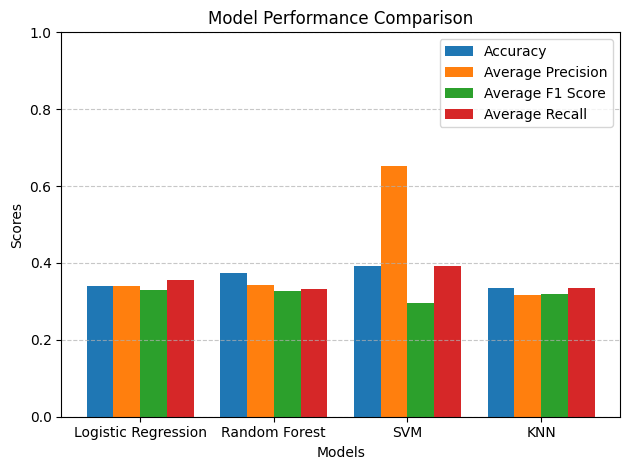

In [5]:

import matplotlib.pyplot as plt
import numpy as np

# Verileri tanımlama
models = ["Logistic Regression", "Random Forest", "SVM", "KNN"]
accuracy = [0.3403, 0.3726, 0.3916, 0.3346]
average_precision = [0.3393, 0.3435, 0.6534, 0.3170]
average_f1 = [0.3289, 0.3275, 0.2970, 0.3182]
average_recall = [0.3555, 0.3335, 0.3916, 0.3346]

# Grafikleri oluşturma
x = np.arange(len(models))  # Model isimlerinin indeksleri
bar_width = 0.2  # Bar genişliği

# Her metrik için barların yerini ayarlama
plt.bar(x - bar_width, accuracy, bar_width, label="Accuracy")
plt.bar(x, average_precision, bar_width, label="Average Precision")
plt.bar(x + bar_width, average_f1, bar_width, label="Average F1 Score")
plt.bar(x + 2 * bar_width, average_recall, bar_width, label="Average Recall")

# Grafik detayları
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x + bar_width / 2, models)
plt.ylim(0, 1)  # Skorlar 0 ile 1 arasında olduğu için
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafiği göster
plt.tight_layout()
plt.show()
